pip install quandl

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [2]:
#Creating path string
path = r'C:\Users\Alex Lam\Desktop\Career Foundary\Citi Bike Analysis'

In [3]:
#Importing datasets
df_citi_bike = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citi bike prepared 2.csv'))

In [4]:
df_citi_bike.head()

,Unnamed: 0,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,trip_duration,subscriber,birth_year,gender,end_date,end_hour,trip_duration_min,Age Group,Trip Duration Group,Day of the Week Label
0,0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,993,Subscriber,1968.0,F,2013-09-09,18,16.550000,Middle Aged,Medium,1
1,1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,581,Subscriber,1983.0,M,2013-09-12,18,9.683333,Young,Short,4
2,2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,361,Subscriber,1989.0,M,2013-09-18,19,6.016667,Young,Short,3
3,3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,561,Subscriber,1988.0,F,2013-09-28,12,9.350000,Young,Short,6
4,4,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,...,2296,Non-Subscriber,NaN,NaN,2013-09-07,18,38.266667,Middle Aged,Long,6


In [5]:
df_citi_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               50000 non-null  int64  
 1   day_of_week              50000 non-null  object 
 2   start_hour               50000 non-null  int64  
 3   start_time               50000 non-null  object 
 4   start_station_id         50000 non-null  int64  
 5   start_station_name       50000 non-null  object 
 6   start_station_latitude   50000 non-null  float64
 7   start_station_longitude  50000 non-null  float64
 8   end_time                 50000 non-null  object 
 9   end_station_id           50000 non-null  int64  
 10  end_station_name         50000 non-null  object 
 11  end_station_latitude     50000 non-null  float64
 12  end_station_longitude    50000 non-null  float64
 13  trip_duration            50000 non-null  int64  
 14  subscriber            

# Creating a Date Subset

The subset will be date and the number of total bike trips.

In [6]:
#Splitting start_time variable to separate the date from the time
df_citi_bike[['start_date', 'start_time_2']] = df_citi_bike['start_time'].str.split(' ', expand=True)

In [7]:
#Dropping unnecessary column
df_citi_bike = df_citi_bike.drop(columns = ['start_time_2'])

In [8]:
#Checking output of new column
df_citi_bike['start_date']

0        2013-09-09
1        2013-09-12
2        2013-09-18
3        2013-09-28
4        2013-09-07
            ...    
49995    2013-09-21
49996    2013-09-14
49997    2013-09-07
49998    2013-09-07
49999    2013-09-23
Name: start_date, Length: 50000, dtype: object

In [9]:
#Creating new dataframe calculating number of trips per day
#df_citi_bike_subset = df_citi_bike.groupby('start_date').agg(num_of_trips = ('start_date', 'count'), avg_ride_time = ('trip_duration_min', 'mean'))
df_citi_bike_subset = df_citi_bike.groupby('start_date').agg(num_of_trips = ('start_date', 'count'))

In [10]:
#Checking output
df_citi_bike_subset.head()

,num_of_trips
start_date,
2013-09-01,1190
2013-09-02,1041
2013-09-03,1539
2013-09-04,1769
2013-09-05,1624


In [11]:
df_citi_bike_subset = df_citi_bike_subset.reset_index()

In [12]:
df_citi_bike_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   start_date    30 non-null     object
 1   num_of_trips  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


In [13]:
df_citi_bike_subset.head()

,start_date,num_of_trips
0,2013-09-01,1190
1,2013-09-02,1041
2,2013-09-03,1539
3,2013-09-04,1769
4,2013-09-05,1624


In [14]:
df_citi_bike_subset.head()

,start_date,num_of_trips
0,2013-09-01,1190
1,2013-09-02,1041
2,2013-09-03,1539
3,2013-09-04,1769
4,2013-09-05,1624


In [15]:
from datetime import datetime

In [16]:
#Creating column with datetime datatype
df_citi_bike_subset['date'] = pd.to_datetime(df_citi_bike_subset['start_date'])
df_citi_bike_subset.drop(['start_date'], axis = 1, inplace = True)
df_citi_bike_subset

,num_of_trips,date
0,1190,2013-09-01
1,1041,2013-09-02
2,1539,2013-09-03
3,1769,2013-09-04
4,1624,2013-09-05
5,1721,2013-09-06
6,1607,2013-09-07
7,1577,2013-09-08
8,1665,2013-09-09
9,1810,2013-09-10


In [17]:
df_citi_bike_subset = df_citi_bike_subset.reset_index()

In [18]:
#Checking output after restarting index
df_citi_bike_subset.head()

,index,num_of_trips,date
0,0,1190,2013-09-01
1,1,1041,2013-09-02
2,2,1539,2013-09-03
3,3,1769,2013-09-04
4,4,1624,2013-09-05


In [19]:
#Setting dates in proper order
df_citi_bike_subset = df_citi_bike_subset.sort_values('date')

In [20]:
#Checking output after sort values
df_citi_bike_subset.head()

,index,num_of_trips,date
0,0,1190,2013-09-01
1,1,1041,2013-09-02
2,2,1539,2013-09-03
3,3,1769,2013-09-04
4,4,1624,2013-09-05


In [21]:
#Setting date to index for line plot
df_citi_bike_subset = df_citi_bike_subset.set_index('date')

In [22]:
df_citi_bike_subset.head()

,index,num_of_trips
date,,
2013-09-01,0,1190
2013-09-02,1,1041
2013-09-03,2,1539
2013-09-04,3,1769
2013-09-05,4,1624


In [23]:
df_citi_bike_subset = df_citi_bike_subset.drop(columns = 'index')

# Lineplot 

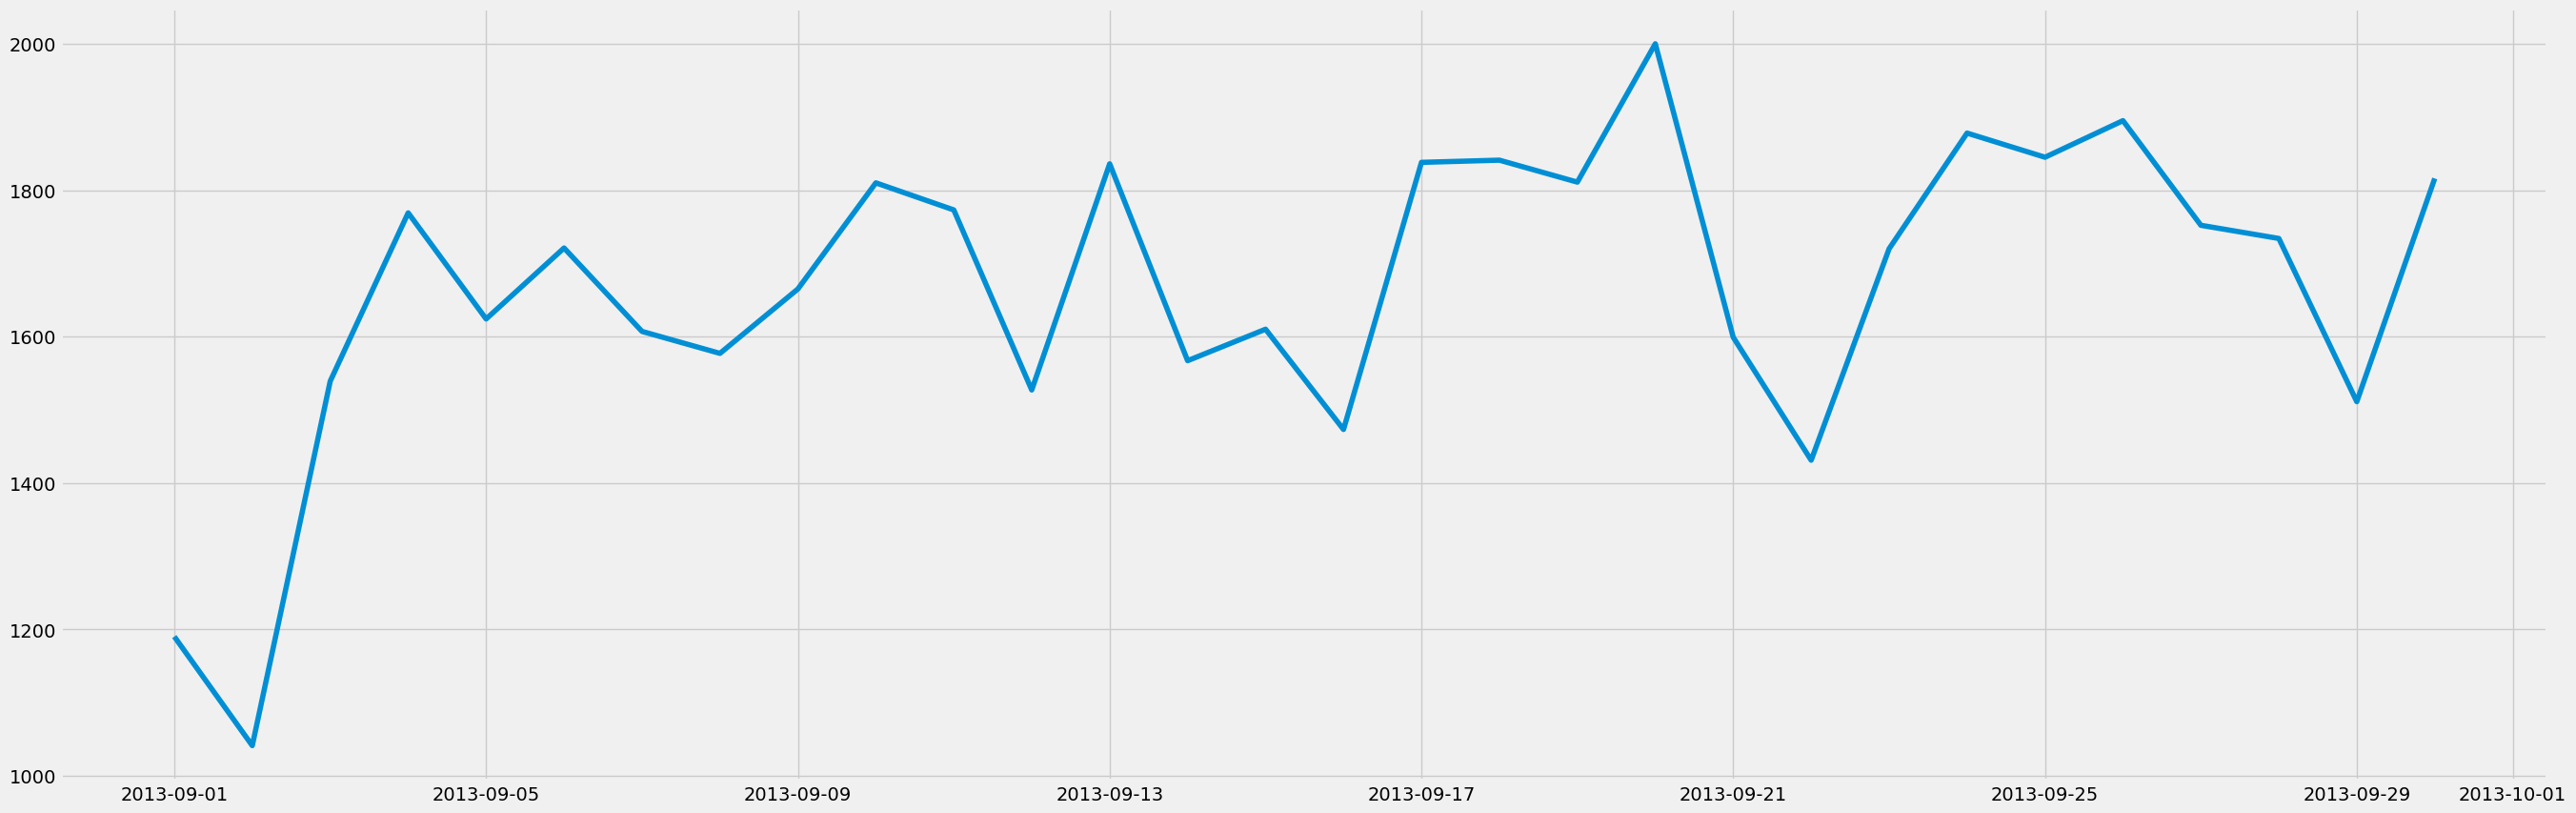

In [24]:
#Lineplot of number of rides per date
plt.figure(figsize=(30,10), dpi=100) 
plt.plot(df_citi_bike_subset)
plt.savefig(os.path.join(path, '04 Analysis', 'Number of Rides Per Date.png'), bbox_inches='tight', dpi=1000)

In [25]:
# Checking for missing values 
df_citi_bike_subset.isnull().sum() 

num_of_trips    0
dtype: int64

In [26]:
#Checking for duplicate values
dups = df_citi_bike_subset.duplicated()
dups.sum()

0

# Decompose

In [27]:
decomposition = sm.tsa.seasonal_decompose(df_citi_bike_subset, model='additive')

In [28]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

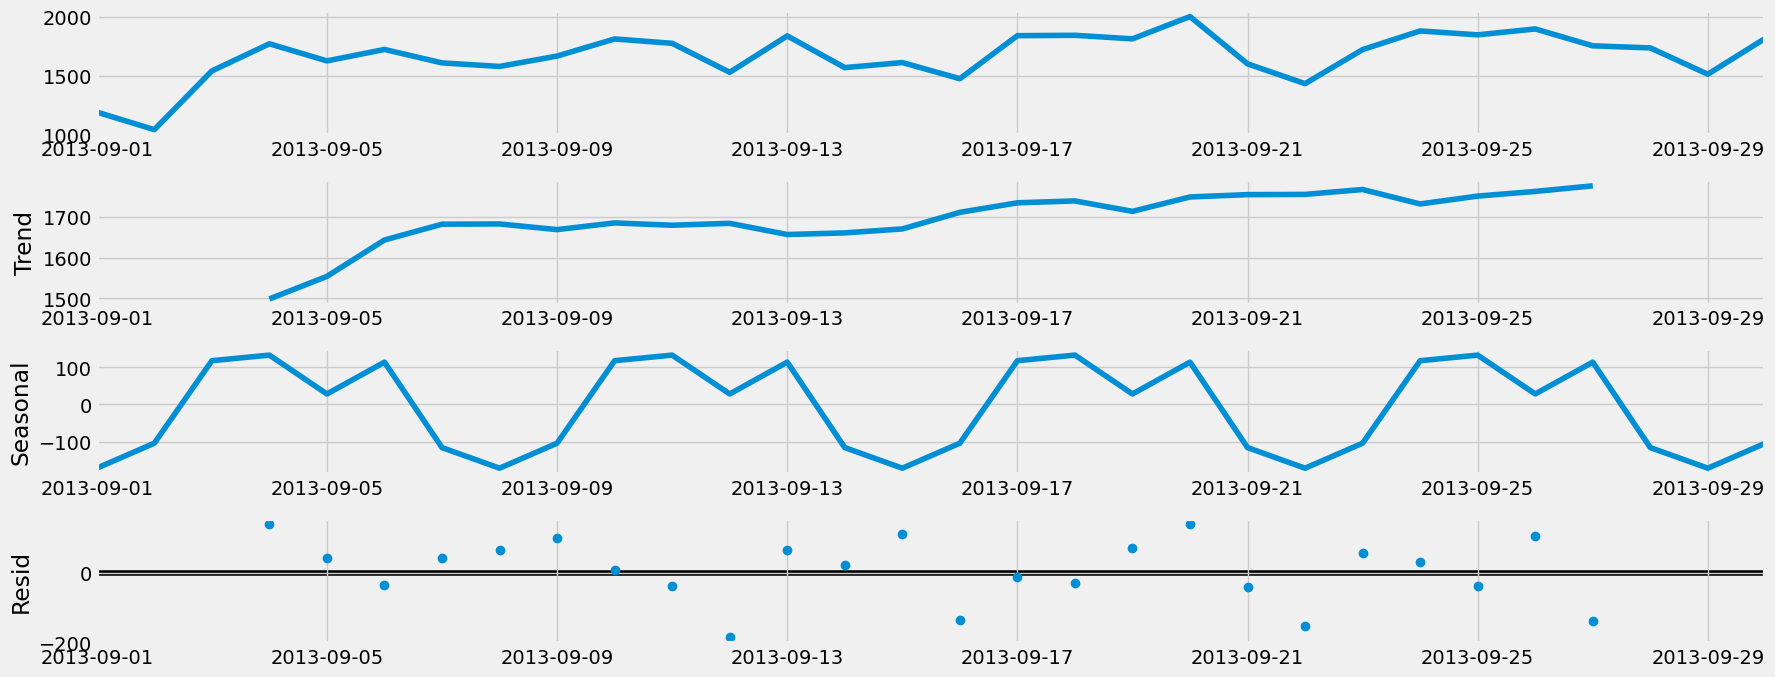

In [29]:
# Plot the separate components

decomposition.plot()
plt.show()
#plt.savefig(os.path.join(path, '04 Analysis', 'Decompose.png'), bbox_inches='tight', dpi=3000)

The trend graph shows a general increase in trips through the month.

The seasonal graph shows the number of trip fluctuates up and down throughout the month.

The residual graph shows a similar trend to the seasonal graph as it also goes up and down throughout the month.

# Dickey-Fuller Stationary Test

In [30]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_citi_bike_subset['num_of_trips'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.867545
p-value                         0.002287
Number of Lags Used             0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


The p value is less than 0.05, which indicates a significant result. The null hypothesis is that there is a unit root within the data, which means the data is stationary.

The null hypothesis was disproven. The test statistic is smaller than all the critical values.

# Autocorrection

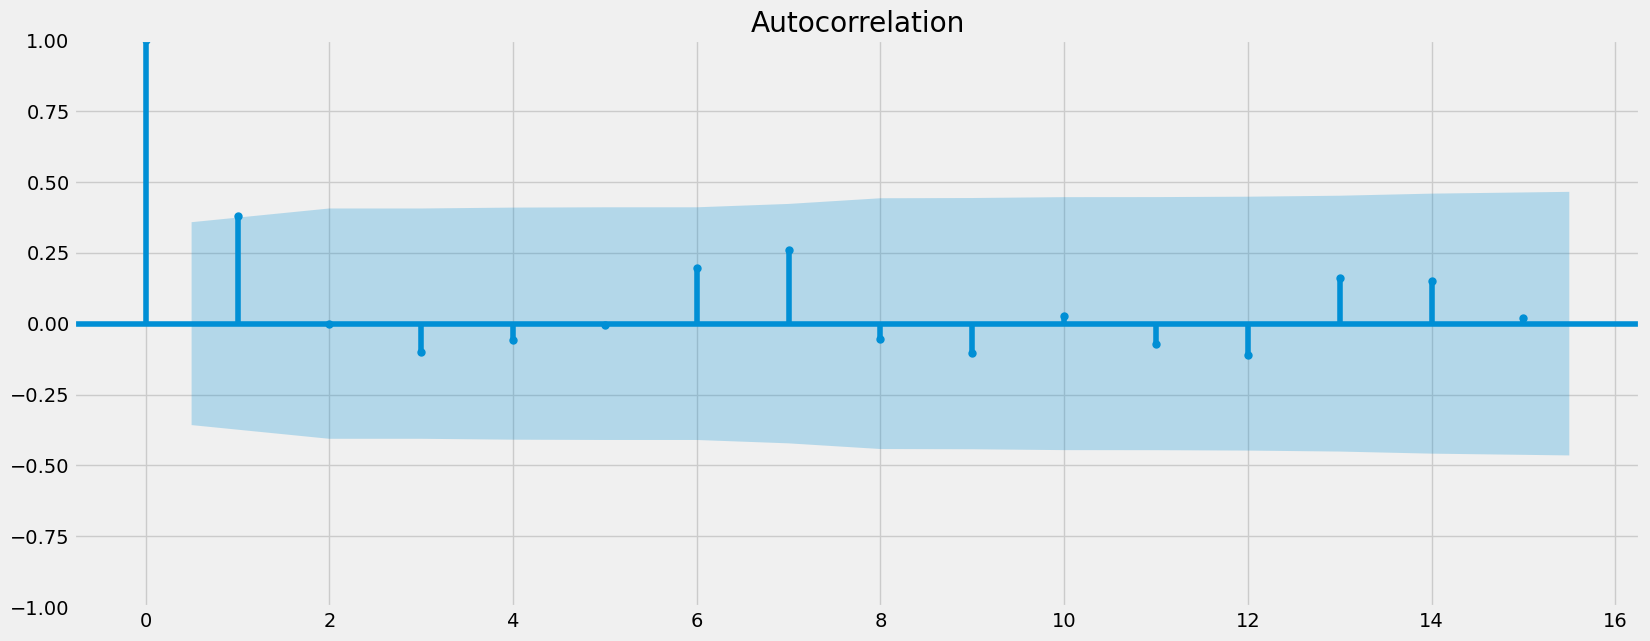

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_citi_bike_subset)
plt.show()